In [2]:
from src.data import semi_empirical_mass_formula, get_nuclear_data
from matplotlib import pyplot as plt
import numpy as np
import os
plt.style.use('mine')

In [3]:
data = get_nuclear_data(get_ame=False, ge=0)
z = data.z[~data.binding.isna()].values
n = data.n[~data.binding.isna()].values
binding = data.binding[~data.binding.isna()].values
semf = semi_empirical_mass_formula(z, n)

/tmp/ipykernel_3215310/3291801912.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0)


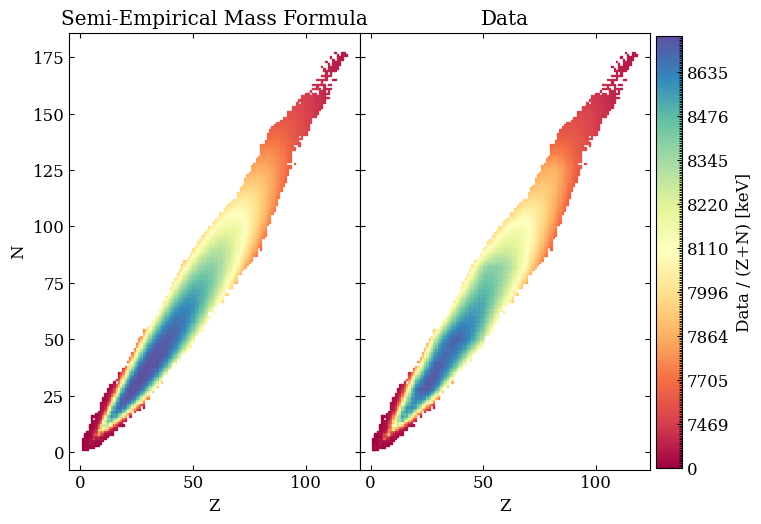

In [4]:
# Plotting the semi-empirical mass formula
import matplotlib.colors as colors

cmap = plt.get_cmap('Spectral')
def make_norm(vals, N=None, norm_type='quantile'):
    # Define boundaries based on quantiles
    if N is None:
        N = cmap.N
    if norm_type == 'quantile':
        boundaries = np.quantile(vals, np.linspace(0, 1, N))
        norm = colors.BoundaryNorm(boundaries, cmap.N)
    elif norm_type == 'log':
        norm = colors.LogNorm(vmin=np.min(vals), vmax=np.max(vals))
    else:
        norm = plt.Normalize(vmin=np.min(vals), vmax=np.max(vals))
    return norm

vals = np.concatenate([semf, binding])

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes = axes.flatten()
ax = axes[0]


sc = ax.scatter(x=z, y=n, c=semf, cmap=cmap, rasterized=True, s=1, marker='s', norm=make_norm(vals))
ax.set_title('Semi-Empirical Mass Formula'); ax.set_ylabel('N'); ax.set_xlabel('Z')
ax.set_aspect('equal')

ax = axes[1]
sc = ax.scatter(x=z, y=n, c=binding, cmap=cmap, rasterized=True, s=1, marker='s', norm=make_norm(vals))
ax.set_title('Data'); ax.set_xlabel('Z')
ax.set_aspect('equal')
# set size of last axis
cbar_ax = fig.add_axes([1.01, 0.07, 0.04, 0.9])
cbar = fig.colorbar(sc, label='Data / (Z+N) [keV]', cax=cbar_ax, shrink=1, pad=0.05)


fig.tight_layout(pad=0)
if not os.path.exists('../plots/paper/figures'):
    os.makedirs('../plots/paper/figures')
plt.savefig('../plots/paper/figures/semf.pdf', bbox_inches='tight', pad_inches=0.01, dpi=300)
plt.show()

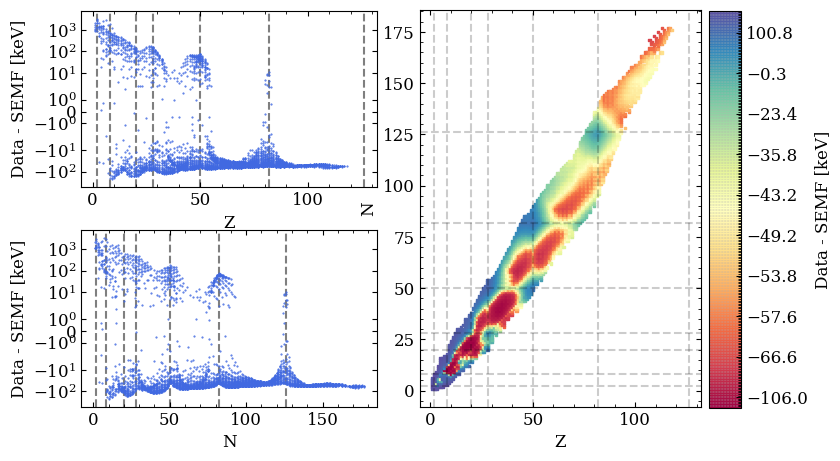

In [7]:
# Now let's take a look at the residuals
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8, 8))
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(8, 6))
# 2D Plot
ax = axd['right']

magic_n = [2, 8, 20, 28, 50, 82, 126]
for number in magic_n:
    ax.axvline(x=number, color='k', ls='--', alpha=0.2)
    ax.axhline(y=number, color='k', ls='--', alpha=0.2)

c = (binding - semf)
sc = ax.scatter(x=z, y=n, c=c, cmap=cmap, rasterized=True, s=3, marker='s', norm=make_norm(c, norm_type='quantile'))
ax.set_ylabel('N'); ax.set_xlabel('Z')
ax.set_aspect('equal')
cbar_ax = fig.add_axes([0.91, 0.162, 0.04, 0.662])
ax.minorticks_on(); plt.grid(which='both', alpha=0.5); fig.colorbar(sc, cax=cbar_ax, label='Data - SEMF [keV]')
right_box = ax.get_position()



# residual as a function of Z
ax = axd['upper left']
# make ax shorter
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.05, box.height*.84])
ax.plot(z, c, '.', ms=1, rasterized=True); ax.set_yscale('symlog')
for number in magic_n:  
    ax.axvline(x=number, color='k', ls='--', alpha=0.5, zorder=-1)
ax.set_xlabel('Z'); ax.set_ylabel('Data - SEMF [keV]')
ax.minorticks_on(); plt.grid(which='both', alpha=0.5)

# residual as a function of N
ax = axd['lower left']
box = ax.get_position()
ax.set_position([box.x0, right_box.y0, box.width * 1.05, box.height*.84])
ax.plot(n, c, '.', ms=1, rasterized=True); ax.set_yscale('symlog')
for number in magic_n:  
    ax.axvline(x=number, color='k', ls='--', alpha=0.5, zorder=-1)
ax.set_xlabel('N'); ax.set_ylabel('Data - SEMF [keV]')
ax.minorticks_on(); plt.grid(which='both', alpha=0.5)
# fig.tight_layout(pad=0)
fig.savefig('../plots/paper/figures/residual.pdf', bbox_inches='tight', pad_inches=0.01)